In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sms

In [2]:
os.listdir('../derivatives/')
sub_df=pd.read_csv('../derivatives/OutlierRuns.tsv',sep='\t')

sub_df=sub_df[sub_df['outlier_run']==False]
sub_df['sub_run']=sub_df['Sub']+'_'+sub_df['run'].astype('str')
sub_df.head()

,Sub,task,run,tsnr,fd_mean,outlier_run,sub_run
0,sub-1001,mid,1,69.988391,0.149729,False,sub-1001_1
1,sub-1001,mid,2,55.697644,0.184703,False,sub-1001_2
2,sub-1002,mid,1,77.148079,0.111157,False,sub-1002_1
3,sub-1002,mid,2,90.519196,0.092381,False,sub-1002_2
4,sub-1003,mid,1,66.602654,0.171448,False,sub-1003_1


In [4]:
#Import the Libraries
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
import os
from natsort import natsorted
import re

#Make a list of the files
Mat_Beh_dir='/ZPOOL/data/projects/istart/Monetary_Incentive/data'
ML_EvFiles_list=natsorted([os.path.join(root,f) for root,dirs,files in os.walk(
    Mat_Beh_dir) for f in files if 'run' in f])

print("The number of Subjects are: %s"%(len([x for x in os.listdir(Mat_Beh_dir) if x.startswith('sub')])))
print("The number of files are: %s"%(len(ML_EvFiles_list)))
print("----------------------------------------")
#Make Conditions for Run1 and Run2
run_cond=loadmat('%s/../timing/run1.mat'%(Mat_Beh_dir))
run1=run_cond['run']['cond'][0,0]
run1 = np.where(run1==['1'], 'Large_gain', run1)
run1 = np.where(run1==[1], 'Large_gain', run1)
run1 = np.where(run1==['2'], 'Large_loss', run1)
run1 = np.where(run1==['3'], 'Small_gain', run1)
run1 = np.where(run1==['4'], 'Small_loss', run1)
run1 = np.where(run1==['5'], 'Neutral', run1)
run1=np.concatenate(run1)

run_cond=loadmat('%s/../timing/run2.mat'%(Mat_Beh_dir))
run2=run_cond['run']['cond'][0,0]
run2 = np.where(run2==[1], 'Large_gain', run2)
run2 = np.where(run2==['1'], 'Large_gain', run2)
run2 = np.where(run2==['2'], 'Large_loss', run2)
run2 = np.where(run2==['3'], 'Small_gain', run2)
run2 = np.where(run2==['4'], 'Small_loss', run2)
run2 = np.where(run2==['5'], 'Neutral', run2)
run2=np.concatenate(run2)

The number of Subjects are: 60
The number of files are: 83
----------------------------------------


/tmp/ipykernel_125562/2125504533.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  run1 = np.where(run1==['1'], 'Large_gain', run1)
/tmp/ipykernel_125562/2125504533.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  run1 = np.where(run1==[1], 'Large_gain', run1)


In [5]:
display(ML_EvFiles_list)

['/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1001/run-1_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1001/run-2_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1002/run-1_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1002/run-2_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1003/run-1_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1004/run-1_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1004/run-2_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1006/run-1_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1007/run-1_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1007/run-2_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1009/run-1_output.mat',
 '/ZPOOL/data/projects/istart/Monetary_Incentive/data/sub-1009/run-2_output.mat',
 '/ZPOOL/data/pr

In [6]:
data_dir='/ZPOOL/data/projects/istart/Monetary_Incentive/'
len(os.listdir('%s/bids_archive/bids'%(data_dir)))

49

In [7]:
len(sub_df['Sub'].unique())

51

In [8]:
data=[]
for ML_EvFile in ML_EvFiles_list:
    #print(ML_EvFile)
    sub='sub-'+re.search('sub-(.*)/',ML_EvFile).group(1)
    run=re.search('run-(.*)_out',ML_EvFile).group(1)
    #if sub+'_'+run in sub_df['sub_run'].values:
    #print(sub,run)
    mat = loadmat(ML_EvFile)  # load mat-file
    mdata = mat['output']  # variable in mat file
    mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
    # * SciiencPy reads in structures as structureprintd NumPy arrays of dtype object
    # * The size of the array is the size of the structure array, not the number
    #   elements in any particular field. The shape defaults to 2-dimensional.
    # * For convene make a dictionary of the data using the names from dtypes
    # * Since the structure has only one element, but is 2-D, index it at [0, 0]
    ndata = {n: mdata[n][0, 0] for n in mdtype.names}
    # Reconstruct the columns of the data table from just the time series
    # Use the number of intervals to test if a field is a column or metadata
    columns = [n for n in ndata]
    #Check fo frame
    # now make a data frame, setting the time stamps as the index
    lens=[len(x[0]) for x in ndata.values()]
    if lens.count(lens[0]) == len(lens):
        df = pd.DataFrame(np.transpose(np.concatenate([ndata[c] for c in columns])),
                  columns=columns)
        if run=='1':
            if len(df)==50:
                df['trial_type']=run1[0:50]
            elif len(df)==75:
                df['trial_type']=run1
        if run=='2':
            df['trial_type']=run2
        df['sub']=sub
        df['run']=run
        data.append(df)
df=pd.concat(data)

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RT', ylabel='Count'>

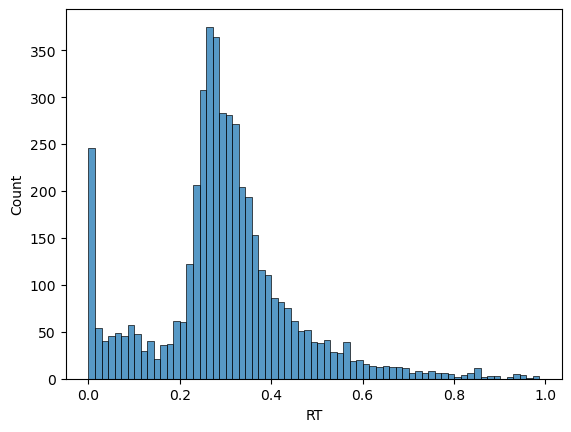

In [9]:
sms.histplot(x=df['RT'])

In [10]:
misses=[]
for sub in df['sub'].unique():
    tmp=df[df['sub']==sub]
    for run in tmp['run'].unique():
        tmp=tmp[tmp['run']==run]
        misses.append(len(tmp[(tmp['RT']==0)&(tmp['outcome']==0)]))

In [11]:
print(" The largest number of missed trials is %s this is less than 20 percent of trials"%(np.max(misses)))

 The largest number of missed trials is 6 this is less than 20 percent of trials


In [12]:
df.loc[df["trial_type"] == "1", "trial_type"] = "Large_gain"
df['run']=df['run'].astype(int)
df.groupby(by=['sub','run']).max().reset_index()

,sub,run,outcome,trial_starts,target_starts,RT,thresh,trial_type
0,sub-1001,1,1.0,443.596841,445.607023,0.690546,0.584389,Small_loss
1,sub-1001,2,1.0,450.916843,454.927744,0.846985,0.511823,Small_loss
2,sub-1002,1,1.0,443.595531,445.605782,0.491392,0.464767,Small_loss
3,sub-1002,2,1.0,450.928644,454.939221,0.571258,0.466639,Small_loss
4,sub-1003,1,1.0,443.546470,445.555652,0.738533,0.496835,Small_loss
...,...,...,...,...,...,...,...,...
75,sub-3210,1,1.0,679.768941,682.773112,0.823762,0.458219,Small_loss
76,sub-3212,1,1.0,679.607846,682.610161,0.857764,0.456245,Small_loss
77,sub-3218,1,1.0,679.653301,682.655712,0.557942,0.466697,Small_loss
78,sub-3220,1,1.0,679.645557,682.648115,0.922452,0.596440,Small_loss


In [13]:
no_miss=df[(df['RT']>0.001)]
no_miss[no_miss['RT']==0]
df=no_miss

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RT', ylabel='Count'>

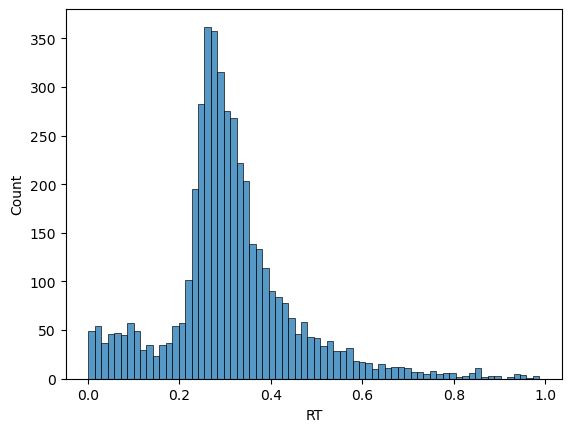

In [14]:
sms.histplot(x=df['RT'])

In [15]:
df.loc[df["trial_type"] == "1", "trial_type"] = "Large_gain"

df['Trial_code']=df['trial_type'].map({"Large_loss":-2,"Small_loss":-1,"Neutral":0,"Small_gain":1,"Large_gain":2})
df['Trial_code'].unique()

array([-1,  0, -2,  2,  1])

In [16]:
df[df['sub']=='sub-3199']

,outcome,trial_starts,target_starts,RT,thresh,trial_type,sub,run,Trial_code
0,1.0,4.005512,6.007814,0.317093,0.354215,Small_loss,sub-3199,1,-1
1,1.0,10.013537,12.015883,0.208390,0.359615,Neutral,sub-3199,1,0
2,1.0,20.824335,24.826691,0.347995,0.405430,Large_loss,sub-3199,1,-2
3,0.0,30.432088,33.435449,0.476594,0.469060,Large_loss,sub-3199,1,-2
4,0.0,38.880598,42.884209,0.412769,0.433266,Large_gain,sub-3199,1,2
...,...,...,...,...,...,...,...,...,...
70,0.0,639.997196,643.999625,0.329608,0.338173,Small_gain,sub-3199,1,1
71,0.0,656.809263,658.811312,0.436908,0.383256,Small_gain,sub-3199,1,1
72,1.0,664.016155,667.018345,0.042789,0.324323,Small_loss,sub-3199,1,-1
73,1.0,670.022225,674.024309,0.380891,0.478732,Small_gain,sub-3199,1,1


,sub,trial_type,outcome,trial_starts,target_starts,RT,thresh,run,Trial_code
0,sub-1001,Large_gain,1.0,246.980226,249.991329,0.305435,0.418198,1.5,2.0
1,sub-1001,Large_loss,1.0,185.605540,188.116553,0.308371,0.411154,1.5,-2.0
2,sub-1001,Neutral,1.0,207.873973,209.884223,0.332187,0.443540,1.5,0.0
3,sub-1001,Small_gain,1.0,281.873566,285.883902,0.320507,0.376292,1.5,1.0
4,sub-1001,Small_loss,1.0,156.110382,159.620759,0.362250,0.426017,1.5,-1.0


/tmp/ipykernel_125562/1342539350.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sms.barplot(x='Trial_code',y='RT',data=group_df,ci=68)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='Trial_code', ylabel='RT'>

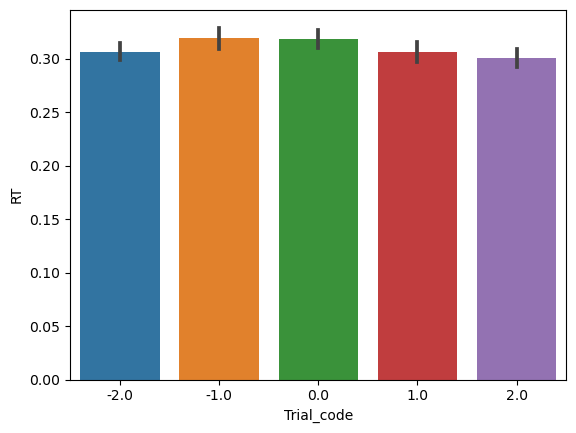

In [17]:
df['run']=df['run'].astype(int)
group_df=df.groupby(by=['sub','trial_type']).median()
group_df=group_df.reset_index()
display(group_df.head())
sms.barplot(x='Trial_code',y='RT',data=group_df,ci=68)

In [19]:
import numpy as np

data=[]
#polynomial fit with degree = 2
for sub in group_df['sub'].unique():
    tmp=group_df[group_df['sub']==sub]
    LG_RT=tmp[tmp['trial_type']=="Large_gain"]['RT'].values[0]
    SG_RT=tmp[tmp['trial_type']=="Small_gain"]['RT'].values[0]
    LL_RT=tmp[tmp['trial_type']=="Large_loss"]['RT'].values[0]
    SL_RT=tmp[tmp['trial_type']=="Small_loss"]['RT'].values[0]
    Neu_RT=tmp[tmp['trial_type']=="Neutral"]['RT'].values[0]
    model = np.poly1d(np.polyfit(tmp['Trial_code'].values, tmp['RT'].values, 2))
    
    data.append([sub,
                 LG_RT
                 model[2],
                 LG_RT-Neu_RT,
                 SG_RT-Neu_RT,
                 LL_RT-Neu_RT,
                 SL_RT-Neu_RT,
                 (LG_RT-Neu_RT)-(LL_RT-Neu_RT),
                 LG_RT-SG_RT,
                 LL_RT-SL_RT
                ])
Fits=pd.DataFrame(columns=['Sub','LG','SG','N','SL','LL','V_beta','LG-N','SG-N','LL-N','SL_N',"rel_rew",'LG-SG','LL_SL'],data=data)

In [20]:
Fits.to_csv('../derivatives/Fits_of_RT.csv',index=False)